<a href="https://www.kaggle.com/code/sivarajsingh/portfolio-ml-k-means-clustering-i?scriptVersionId=138922681" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd
import os 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


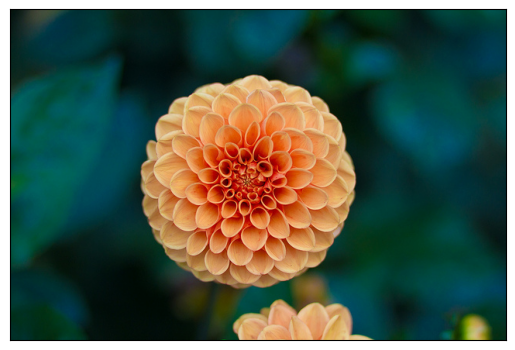

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);


In [4]:
# Returns the image Dimension 
flower.shape

(427, 640, 3)

In [5]:
# Reshape the Data to [n_samples X n_features] and rescale the colors so that they lie between 0 and 1
data = flower / 255.0    # use 0....1 scale
data = data.reshape(427*640,3)
data.shape
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

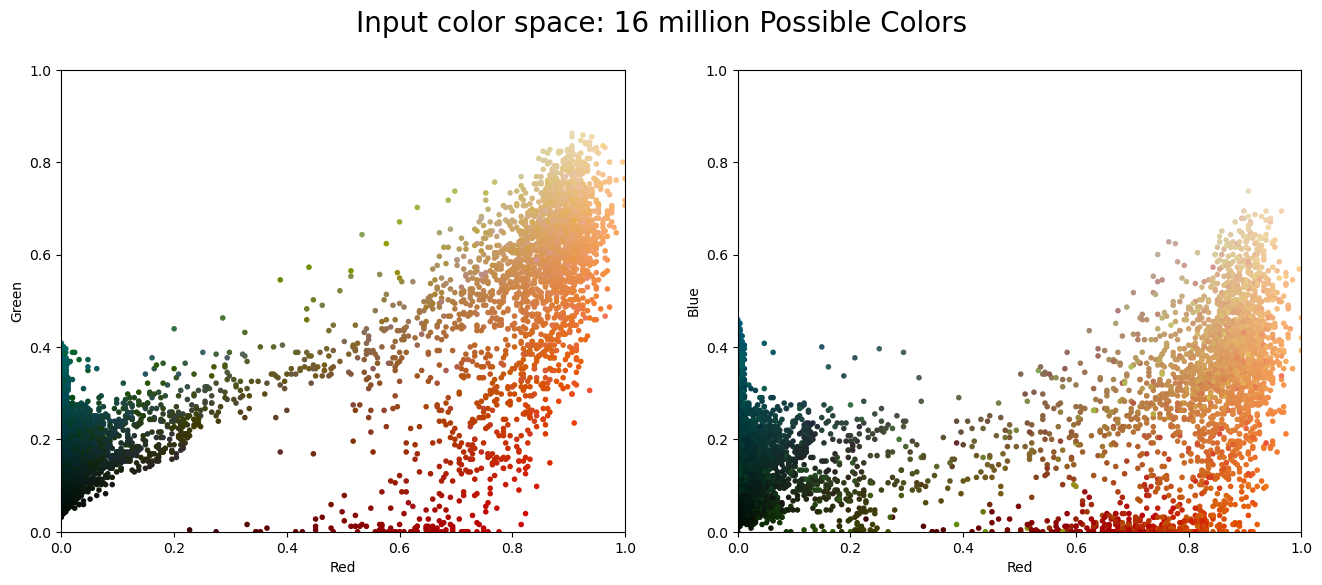

In [6]:
# Visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency
def plot_pixels(data, title, colors = None, N= 10000):
    if colors is None:
        colors = data
    # Choose a random subset 
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim = (0,1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim = (0,1))
    
    fig.suptitle(title,size=20)

plot_pixels(data, title = 'Input color space: 16 million Possible Colors')


In [7]:
# fix numpy issues
#rng = np.random.RandomState(0)
#i = rng.permutation(data.shape[0])[:100]
#R,G, B = data[i].T
#R
import warnings; warnings.simplefilter('ignore')


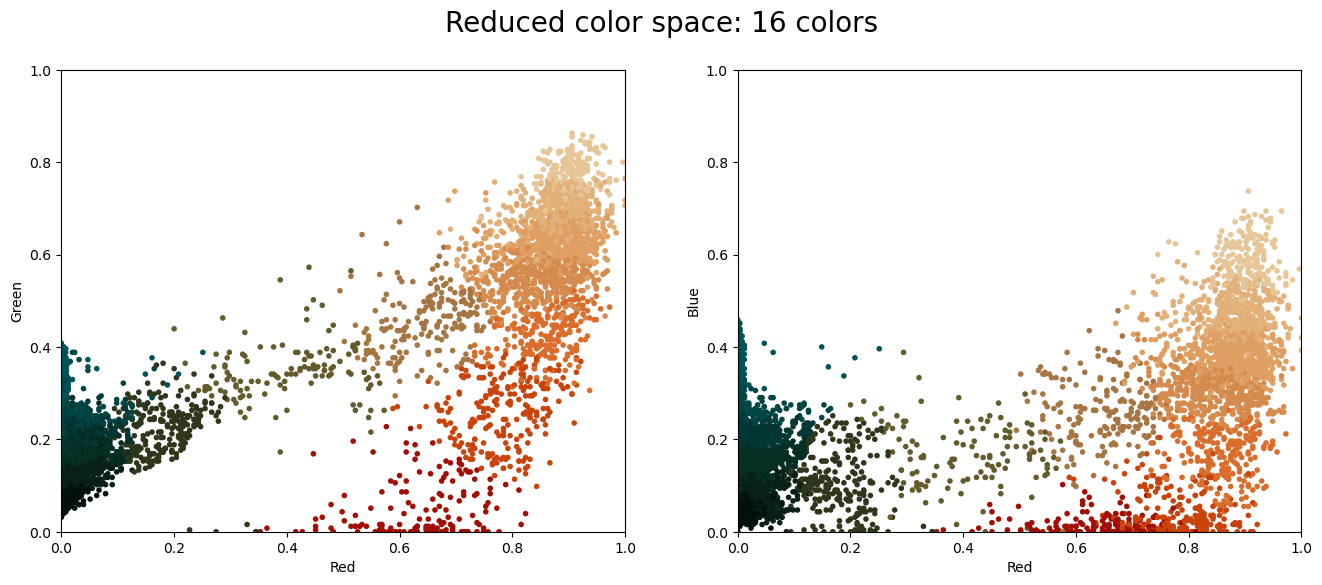

In [8]:
# Reducing these 16 million colors to just 16 colors
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data,colors=new_colors, title = "Reduced color space: 16 colors")

# Result is re-coding of the original pixels, where each pixel is assigned the color of its closest cluster center


Text(0.5, 1.0, '16-color Image')

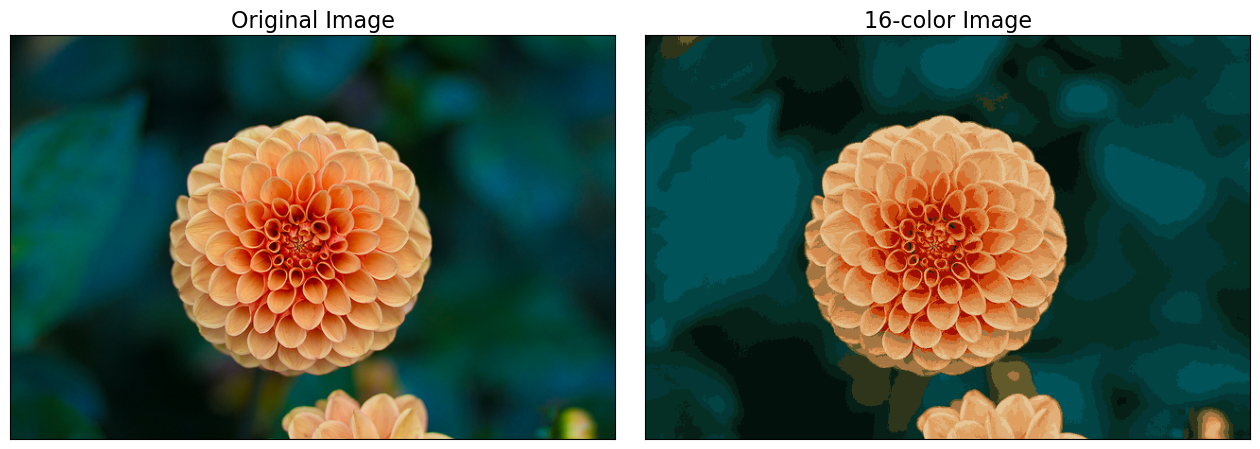

In [9]:
# Result is re-coding of the original pixels, where each pixel is assigned the color of its closest cluster center
flower_recolored = new_colors.reshape(flower.shape)
flower_recolored
fig, ax = plt.subplots(1,2,figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title("Original Image",size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title("16-color Image",size=16)
